# Projet #3 : Conversion rate challenge

## Imports

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
from IPython.display import display

In [9]:
import seaborn as sns

## Read file with labels

In [3]:
dataset = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', dataset.shape)

Set with labels (our train+test) : (284580, 6)


In [4]:
dataset.head(5)

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [6]:
dataset.shape

(284580, 6)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


In [8]:
dataset.describe(include='all')

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


<AxesSubplot:>

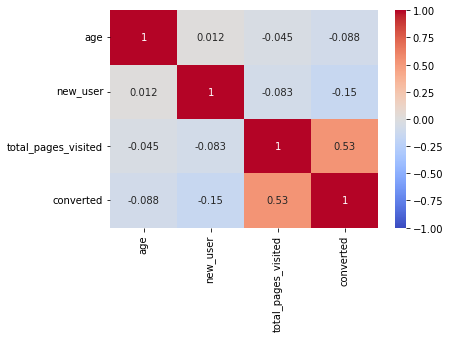

In [11]:
# Plot the heatmap and annotation on it
dataset_correlation = dataset.corr()
sns.heatmap(dataset_correlation, xticklabels=dataset_correlation.columns, yticklabels=dataset_correlation.columns, cmap='coolwarm', vmin=-1, vmax = 1, annot=True)

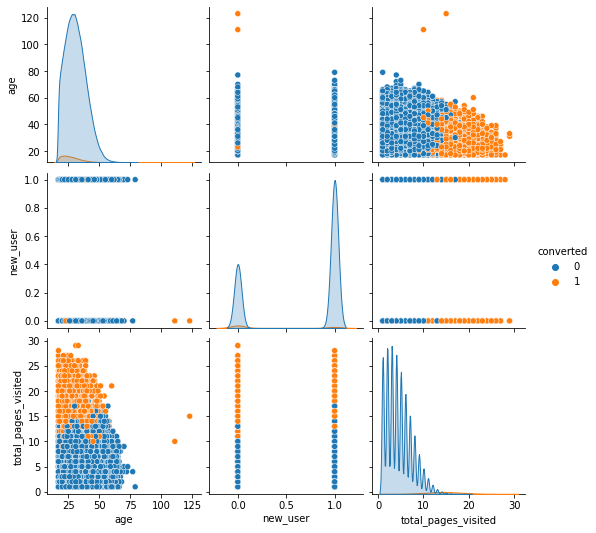

In [12]:
# Pair plot of all variables
sns.pairplot(dataset, hue='converted')

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   age                  284580 non-null  int64
 1   new_user             284580 non-null  int64
 2   total_pages_visited  284580 non-null  int64
 3   converted            284580 non-null  int64
 4   country__China       284580 non-null  uint8
 5   country__Germany     284580 non-null  uint8
 6   country__UK          284580 non-null  uint8
 7   country__US          284580 non-null  uint8
 8   source__Ads          284580 non-null  uint8
 9   source__Direct       284580 non-null  uint8
 10  source__Seo          284580 non-null  uint8
dtypes: int64(4), uint8(7)
memory usage: 10.6 MB


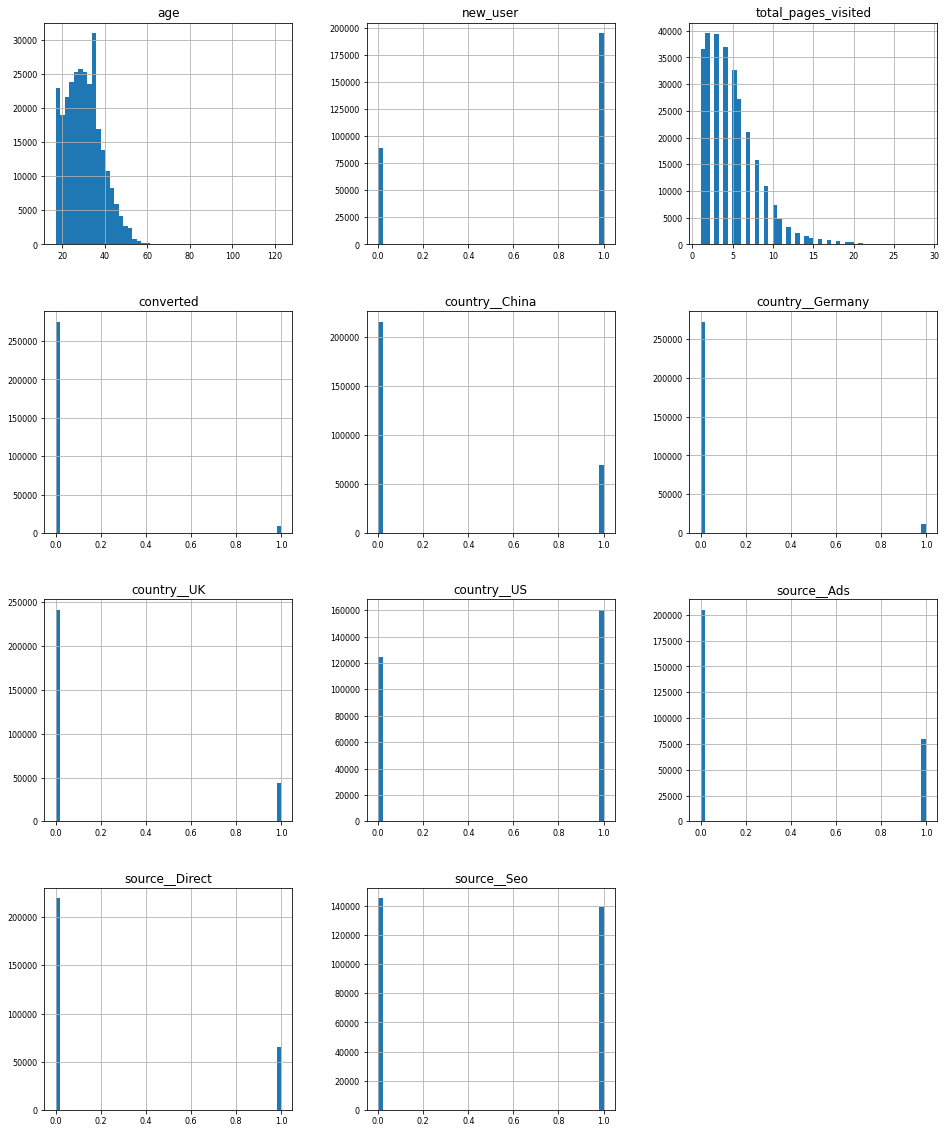

In [24]:
# listing dataframes types
list(set(dataset.dtypes.tolist()))
# include only float and integer
df_num = dataset.select_dtypes(include = ['float64', 'int64', 'UInt32', 'UInt8'])
# display what has been selected
df_num.head()
# plot
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [28]:
features = dataset.columns.tolist()
features.remove('converted')

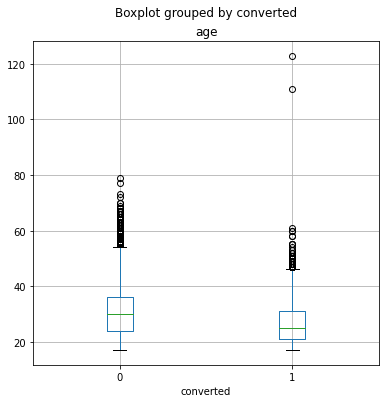

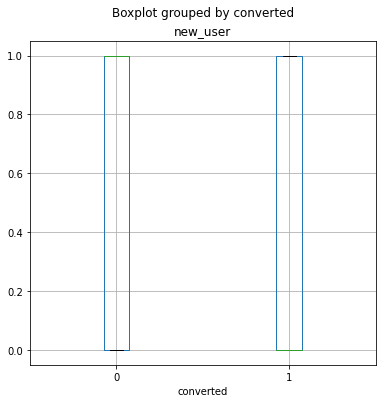

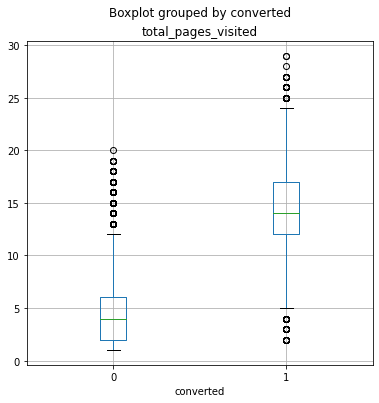

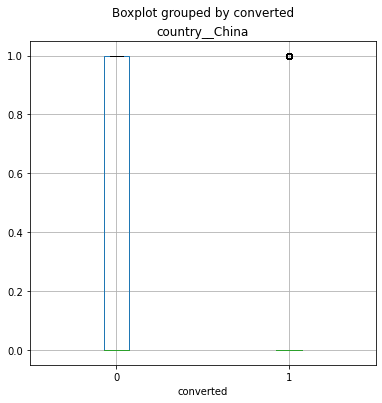

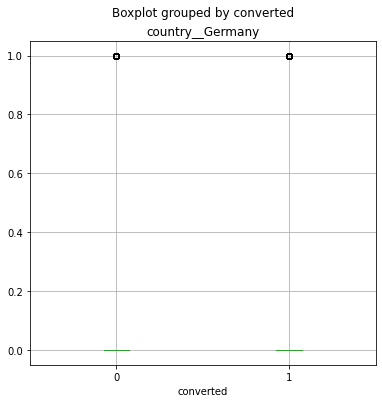

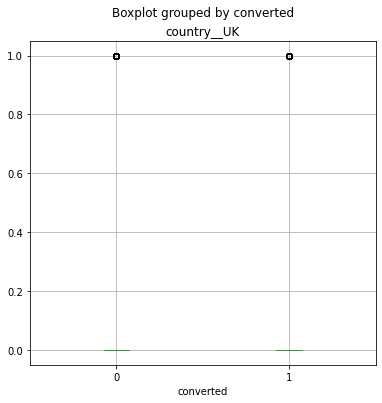

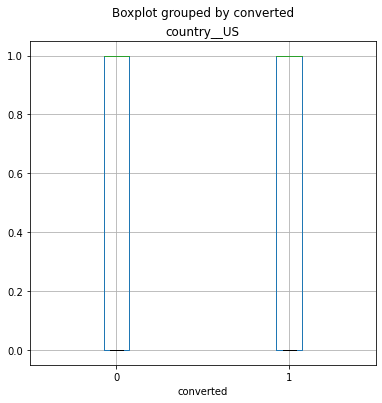

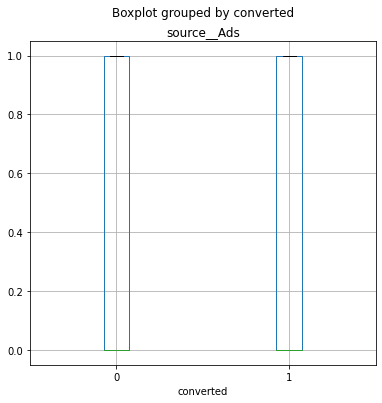

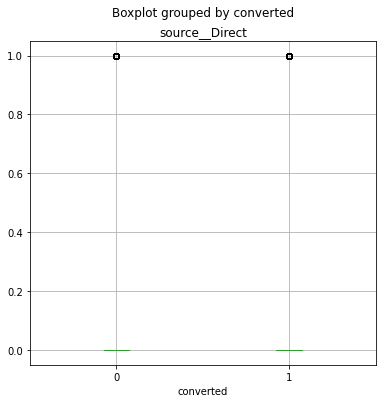

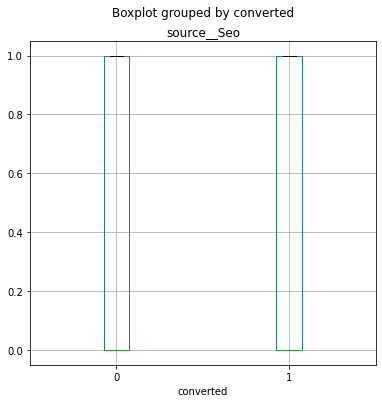

In [29]:
for col in features:
    dataset.boxplot(column=col, by='converted', figsize=(6,6))
    plt.title(col)
plt.show()

In [14]:
dataset = dataset.join(pd.get_dummies(dataset['country'], prefix='country_'))
dataset.head()

,country,age,new_user,source,total_pages_visited,converted,country__China,country__Germany,country__UK,country__US
0,China,22,1,Direct,2,0,1,0,0,0
1,UK,21,1,Ads,3,0,0,0,1,0
2,Germany,20,0,Seo,14,1,0,1,0,0
3,US,23,1,Seo,3,0,0,0,0,1
4,US,28,1,Direct,3,0,0,0,0,1


In [15]:
dataset = dataset.join(pd.get_dummies(dataset['source'], prefix='source_'))
dataset.head()

,country,age,new_user,source,total_pages_visited,converted,country__China,country__Germany,country__UK,country__US,source__Ads,source__Direct,source__Seo
0,China,22,1,Direct,2,0,1,0,0,0,0,1,0
1,UK,21,1,Ads,3,0,0,0,1,0,1,0,0
2,Germany,20,0,Seo,14,1,0,1,0,0,0,0,1
3,US,23,1,Seo,3,0,0,0,0,1,0,0,1
4,US,28,1,Direct,3,0,0,0,0,1,0,1,0


In [19]:
# Drop designated columns
useless_cols = ['country','source']

print("Dropping useless columns...")
dataset = dataset.drop(useless_cols, axis=1) # axis = 1 indicates that we are dropping along the column axis

print("...Done.")
print(dataset.head())

Dropping useless columns...
...Done.
   age  new_user  total_pages_visited  converted  country__China  \
0   22         1                    2          0               1   
1   21         1                    3          0               0   
2   20         0                   14          1               0   
3   23         1                    3          0               0   
4   28         1                    3          0               0   

   country__Germany  country__UK  country__US  source__Ads  source__Direct  \
0                 0            0            0            0               1   
1                 0            1            0            1               0   
2                 1            0            0            0               0   
3                 0            0            1            0               0   
4                 0            0            1            0               1   

   source__Seo  
0            0  
1            0  
2            1  
3            1  


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   age                  284580 non-null  int64
 1   new_user             284580 non-null  int64
 2   total_pages_visited  284580 non-null  int64
 3   converted            284580 non-null  int64
 4   country__China       284580 non-null  uint8
 5   country__Germany     284580 non-null  uint8
 6   country__UK          284580 non-null  uint8
 7   country__US          284580 non-null  uint8
 8   source__Ads          284580 non-null  uint8
 9   source__Direct       284580 non-null  uint8
 10  source__Seo          284580 non-null  uint8
dtypes: int64(4), uint8(7)
memory usage: 10.6 MB


In [35]:
X, y = dataset[features].values, dataset['converted'].values

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [52]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 199206
Test cases: 85374


## Train Logistic Regression

In [53]:
# Set regularization rate
reg = 0.01

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


## or RandomForest Classification

In [67]:
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('logregressor', RandomForestClassifier(n_estimators=100))])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('logregressor', RandomForestClassifier())])


In [68]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [0 0 0 ... 0 0 0]
Actual labels:     [0 1 0 ... 0 0 0]


In [70]:
y_pred_train = model.predict(X_train)

In [71]:
print('Accuracy train: ', metrics.accuracy_score(y_train, y_pred_train))

Accuracy train:  0.9887603787034527


In [72]:
print('Accuracy test: ', metrics.accuracy_score(y_test, predictions))

Accuracy test:  0.9843043549558413


In [73]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     82620
           1       0.81      0.67      0.73      2754

    accuracy                           0.98     85374
   macro avg       0.90      0.83      0.86     85374
weighted avg       0.98      0.98      0.98     85374



In [81]:
print("F1 score on train : "+str(f1_score(y_train, y_pred_train)))
print("F1 score on test : "+str(f1_score(y_test, predictions)))

F1 score on train : 0.8093981442070316
F1 score on test : 0.7344431232659533


<AxesSubplot:>

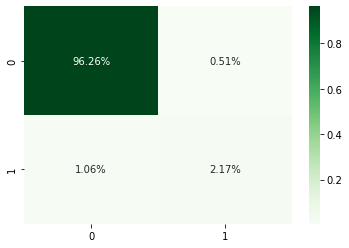

In [74]:
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Greens')

In [82]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [83]:
y_scores = model.predict_proba(X_test)

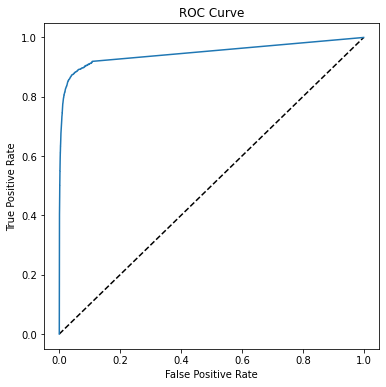

In [84]:
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [85]:
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.948185113811701


In [86]:
# Separate majority and minority classes
dataset_majority = dataset[dataset.converted==0]
dataset_minority = dataset[dataset.converted==1]
 
dataset_majority.shape
from sklearn.utils import resample
# Upsample minority class
df_majority_downsampled = resample(dataset_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=9180,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([dataset_minority, df_majority_downsampled])
 
# Display new class counts
df_upsampled.converted.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

1    9180
0    9180
Name: converted, dtype: int64

In [88]:
import joblib
# Save the model as a pickle file
filename = './randforest_conversionrate_model.pkl'
joblib.dump(model, filename)

['./randforest_conversionrate_model.pkl']